In [3]:
import numpy as np
import cv2
import cv2 as cv
from matplotlib import image 
from matplotlib import pyplot as plt
import math
import pandas as pd

## Import Data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
area_c1 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/area_a_class1.csv')
area_c2 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/area_a_class2.csv')
area_c3 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/area_a_class3.csv')
area_c4 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/area_a_class4.csv')
area_c1

,area1,area2,area3,area4,area5,area6,area7,area8,mean_heart
0,3350.0,3521.5,3360.5,3392.0,3385.5,3391.5,3343.0,3462.5,3400.8125
1,3371.0,3459.0,3407.0,3470.0,3290.5,3387.0,3433.5,3462.5,3410.0625
2,3345.0,3461.0,3407.5,3359.0,3431.5,3375.5,3390.5,3372.0,3392.7500
3,3452.0,3220.0,3268.5,3396.0,3431.0,3215.0,3284.0,3403.0,3333.6875
4,3463.5,3407.5,3411.5,3615.0,3538.5,3498.0,3398.5,3552.0,3485.5625
...,...,...,...,...,...,...,...,...,...
195,3118.0,3141.0,3156.0,3169.5,2833.0,3160.0,2918.5,3218.0,3089.2500
196,3403.0,3210.0,3337.0,1725.0,3173.5,2968.0,3049.5,1627.5,2811.6875
197,3236.0,1577.0,3051.5,1625.5,1513.5,2216.5,2881.5,3280.0,2422.6875
198,3381.0,3342.0,3364.5,3352.5,3315.5,3477.0,3361.0,3342.5,3367.0000


In [4]:
angle_c1 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/angle_com.csv')
angle_c2 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/angle_icm2.csv')
angle_c3 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/angle_icm3.csv')
angle_c4 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/angle_icm4.csv')

In [5]:
disgap_c1 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/disgap_com.csv')
disgap_c2 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/disgap_inc2.csv')
disgap_c3 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/disgap_inc3.csv')
disgap_c4 = pd.read_csv('/content/drive/MyDrive/Project_Diamond/H&A/angle arrow/disgap_inc4.csv')

In [6]:
frames = [area_c1,angle_c1, disgap_c1]
c1 = pd.concat(frames, axis=1)
frames2 = [area_c2,angle_c2, disgap_c2]
c2 = pd.concat(frames2, axis=1)
frames3 = [area_c3,angle_c3, disgap_c3]
c3 = pd.concat(frames3, axis=1)
frames4 = [area_c4,angle_c4, disgap_c4]
c4 = pd.concat(frames4, axis=1)

In [7]:
c1

,area1,area2,area3,area4,area5,area6,area7,area8,mean_heart,angle1,...,dist_gap7_1,dist_gap7_2,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5
0,3350.0,3521.5,3360.5,3392.0,3385.5,3391.5,3343.0,3462.5,3400.8125,73.300756,...,92.021737,10.198039,1.414214,11.661904,92.086915,89.805345,12.165525,4.000000,9.486833,92.698436
1,3371.0,3459.0,3407.0,3470.0,3290.5,3387.0,3433.5,3462.5,3410.0625,73.300756,...,95.005263,14.560220,6.082763,13.341664,94.005319,89.106678,16.278821,2.236068,13.453624,99.724621
2,3345.0,3461.0,3407.5,3359.0,3431.5,3375.5,3390.5,3372.0,3392.7500,76.759480,...,90.049986,15.556349,3.000000,12.529964,91.049437,89.095454,12.083046,1.000000,11.661904,91.934759
3,3452.0,3220.0,3268.5,3396.0,3431.0,3215.0,3284.0,3403.0,3333.6875,75.699723,...,89.022469,10.770330,3.000000,12.369317,91.049437,86.278618,13.928388,2.000000,14.317821,91.219515
4,3463.5,3407.5,3411.5,3615.0,3538.5,3498.0,3398.5,3552.0,3485.5625,76.218403,...,93.000000,14.560220,3.162278,12.165525,93.021503,85.586214,8.062258,1.414214,7.810250,93.380940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3118.0,3141.0,3156.0,3169.5,2833.0,3160.0,2918.5,3218.0,3089.2500,73.909184,...,93.134312,11.180340,2.000000,9.848858,89.005618,83.450584,12.041595,1.414214,10.440307,85.632938
196,3403.0,3210.0,3337.0,1725.0,3173.5,2968.0,3049.5,1627.5,2811.6875,73.610460,...,90.005555,15.811388,1.414214,12.369317,90.022219,85.041167,12.206556,5.385165,14.560220,89.196412
197,3236.0,1577.0,3051.5,1625.5,1513.5,2216.5,2881.5,3280.0,2422.6875,73.495639,...,90.049986,12.041595,1.414214,11.401754,92.005435,84.852814,11.401754,2.000000,16.643317,93.434469
198,3381.0,3342.0,3364.5,3352.5,3315.5,3477.0,3361.0,3342.5,3367.0000,70.497551,...,91.049437,13.000000,4.123106,10.049876,91.005494,84.852814,15.652476,3.605551,15.231546,84.172442


In [8]:
c2

,area1,area2,area3,area4,area5,area6,area7,area8,angle1,angle2,...,dist_gap8_2,dist_gap6_3,dist_gap6_4,dist_gap6_5,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_3,dist_gap8_4,dist_gap8_5
0,2273.0,3356.0,3264.0,3026.5,2043.0,3188.5,1971.5,3130.5,70.942295,26.113913,...,11.000000,11.661904,16.552945,90.553851,3.162278,9.055385,63.198101,5.099020,11.661904,64.536811
1,3876.0,4061.0,3757.0,2949.0,3349.5,3412.0,4249.0,3816.0,70.114835,37.647621,...,14.422205,6.403124,11.401754,96.208108,8.000000,9.848858,99.000000,7.071068,10.440307,105.475116
2,5551.5,4284.0,3699.0,2336.5,2672.5,4884.0,4448.5,5968.5,75.379126,25.513870,...,12.369317,5.385165,12.806248,70.007142,4.472136,12.000000,82.006097,10.198039,12.806248,83.438600
3,4172.0,3680.0,2926.0,2041.5,2402.5,2300.5,2786.0,4764.0,79.286877,27.758541,...,16.552945,12.165525,17.029386,66.189123,5.099020,19.235384,78.025637,7.000000,21.260292,93.348808
4,2432.5,3876.5,3575.0,3333.5,3831.0,3808.5,3296.0,2581.0,80.537678,40.179234,...,7.615773,5.000000,6.708204,92.633687,5.000000,5.099020,84.005952,3.162278,4.123106,85.562842
5,3798.5,3756.5,3273.5,2201.5,2788.0,2418.0,2888.0,1844.0,75.203238,33.690068,...,19.798990,4.123106,17.804494,74.966659,13.152946,22.022716,74.242845,10.295630,21.213203,79.931220
6,3972.5,3790.0,3553.0,3976.0,2797.0,3619.0,3031.0,3582.0,79.438989,26.927678,...,16.643317,3.000000,19.235384,62.225397,5.000000,10.000000,81.024688,5.099020,12.083046,74.652528
7,2367.5,2954.0,2455.0,1771.0,2567.0,2717.5,2561.0,2553.5,73.909184,25.676816,...,13.000000,10.049876,12.727922,87.000000,7.000000,3.162278,86.284413,4.123106,13.341664,82.036577
8,3301.5,3308.5,3586.0,3561.5,3223.5,3554.0,3130.5,2964.5,79.695154,33.996459,...,13.601471,5.385165,9.219544,103.276328,1.000000,6.324555,94.641429,5.099020,8.485281,86.313383
9,3623.0,2122.0,3224.0,2799.0,3964.5,2094.5,4464.0,4990.5,73.779806,31.138972,...,13.453624,6.708204,19.209373,88.526832,4.242641,5.656854,85.211502,7.071068,18.867962,91.547802


In [9]:
c3

,area1,area2,area3,area4,area5,area6,area7,area8,angle1,angle2,...,dist_gap7_1,dist_gap7_2,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5
0,2978.0,3227.0,3446.5,2770.5,3387.5,3623.0,3570.0,3124.5,78.518009,30.411081,...,82.024387,13.601471,1.000000,74.168727,64.845971,81.467785,18.248288,4.000000,10.049876,79.246451
1,3798.5,3756.5,3273.5,2201.5,2788.0,2418.0,888.0,1844.0,75.718904,28.610460,...,90.022219,23.409400,7.000000,21.189620,85.328776,79.309520,14.866069,15.000000,13.601471,76.419893
2,1355.0,1533.0,3236.0,3233.5,3145.0,1291.5,1347.5,1471.0,77.005383,28.300756,...,93.021503,4.242641,2.828427,2.828427,67.742158,78.517514,7.000000,10.630146,9.219544,72.401657
3,2621.0,2632.0,1581.5,1509.0,1408.5,3329.0,3066.5,2423.5,78.486169,31.534792,...,86.209048,2.236068,5.385165,5.385165,80.006250,84.852814,4.242641,3.162278,17.720045,94.260278
4,2752.5,3169.0,3259.5,2263.5,1667.5,3318.0,2935.5,2470.0,76.908107,38.453709,...,88.141931,14.000000,16.031220,16.278821,90.049986,82.036577,13.892444,10.049876,25.079872,95.482983
5,2432.0,2423.0,2573.0,2393.5,1193.5,1537.5,1050.0,1114.0,82.405357,39.472460,...,92.444578,34.539832,25.000000,27.018512,41.868843,84.899941,12.806248,9.433981,24.351591,77.987178
6,3362.0,3135.5,1650.5,3225.5,3562.5,3290.0,3047.0,3309.0,73.033852,30.411081,...,80.056230,7.211103,7.615773,28.071338,94.191295,97.000000,5.656854,7.810250,8.062258,86.452299
7,1988.0,1295.0,1330.5,1401.5,1227.0,2024.0,978.5,1190.0,88.898294,33.453309,...,101.493842,39.000000,27.202941,23.345235,107.228727,92.021737,47.853944,23.021729,35.805028,86.267027
8,1260.5,1132.5,1047.0,1196.0,1035.5,3062.0,1293.5,901.5,73.610460,37.724995,...,110.453610,45.694639,24.020824,22.000000,90.005555,99.704564,41.880783,25.806976,32.449961,104.890419
9,1435.5,1191.0,1204.5,3446.0,925.0,1389.5,1854.5,1363.0,78.929797,32.550003,...,100.079968,29.832868,21.189620,39.051248,107.116759,78.568442,31.384710,18.384776,22.472205,84.172442


In [10]:
c4

,area1,area2,area3,area4,area5,area6,area7,area8,angle1,angle2,...,dist_gap7_1,dist_gap7_2,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5
0,633.5,584.0,592.0,536.5,2271.0,1589.5,596.5,788.0,75.555964,34.380345,...,63.198101,15.524175,11.045361,8.000000,60.207973,70.007142,13.601471,11.401754,11.401754,58.000000
1,552.5,1871.5,473.0,636.0,499.5,740.5,1150.0,707.5,78.310631,31.890792,...,53.460266,12.806248,7.615773,13.152946,66.483081,71.505245,14.866069,13.152946,10.049876,60.876925
2,2199.0,3565.0,1702.0,3682.5,3382.5,3170.0,745.0,1106.5,73.495639,30.411081,...,83.240615,44.283180,32.062439,10.630146,117.515956,71.700767,12.041595,11.401754,15.556349,61.073726
3,492.5,1888.5,944.5,685.0,526.5,833.5,952.5,702.5,89.028978,34.695154,...,66.068147,6.082763,4.123106,7.280110,60.299254,61.073726,14.422205,9.219544,14.560220,62.481997
4,881.5,1890.0,939.5,2971.0,4624.0,3576.0,683.5,947.0,85.462227,50.440332,...,68.359345,11.045361,8.602325,15.652476,65.069194,74.518454,17.888544,10.198039,9.486833,62.968246
5,2527.5,2059.5,1589.0,3247.0,5023.0,3379.0,2868.0,1712.0,74.845932,34.992020,...,105.929222,26.076810,18.110770,12.165525,84.480767,89.872131,14.142136,13.928388,20.248457,69.641941
6,1590.5,1099.0,373.0,192.5,480.5,865.0,2100.5,2871.5,85.848715,37.450578,...,83.096330,34.058773,30.000000,31.256999,85.287748,96.260064,18.439089,14.142136,26.907248,86.683332
7,479.0,698.0,889.5,777.5,752.5,592.0,972.5,2733.0,77.660913,39.805571,...,135.014814,26.570661,36.496575,51.156622,109.018347,73.878278,35.355339,8.544004,11.180340,61.854668
8,1020.5,561.5,532.5,749.5,468.0,1896.0,978.0,780.0,83.884496,31.890792,...,93.193347,41.048752,18.000000,25.632011,86.092973,79.981248,14.142136,8.485281,18.973666,67.416615
9,580.0,699.5,969.5,604.0,685.0,1864.5,2613.5,831.0,69.443955,26.053495,...,101.980390,11.704700,7.071068,18.439089,93.134312,80.659779,18.027756,17.000000,16.401219,91.350972


In [11]:
df_class1 = []
df_class2 = []
df_class3 = []
df_class4 = []
for i in range(0,200):
  df_class1.append('Complete')
for i in range(0,60):
  df_class2.append('Incomplete')
for i in range(0,57):
  df_class3.append('Broken')
for i in range(0,52):
  df_class4.append('Unrecognizable')

In [12]:
c1['class'] = df_class1
c2['class'] = df_class2
c3['class'] = df_class3
c4['class'] = df_class4

In [13]:
c4

,area1,area2,area3,area4,area5,area6,area7,area8,angle1,angle2,...,dist_gap7_2,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5,class
0,633.5,584.0,592.0,536.5,2271.0,1589.5,596.5,788.0,75.555964,34.380345,...,15.524175,11.045361,8.000000,60.207973,70.007142,13.601471,11.401754,11.401754,58.000000,Unrecognizable
1,552.5,1871.5,473.0,636.0,499.5,740.5,1150.0,707.5,78.310631,31.890792,...,12.806248,7.615773,13.152946,66.483081,71.505245,14.866069,13.152946,10.049876,60.876925,Unrecognizable
2,2199.0,3565.0,1702.0,3682.5,3382.5,3170.0,745.0,1106.5,73.495639,30.411081,...,44.283180,32.062439,10.630146,117.515956,71.700767,12.041595,11.401754,15.556349,61.073726,Unrecognizable
3,492.5,1888.5,944.5,685.0,526.5,833.5,952.5,702.5,89.028978,34.695154,...,6.082763,4.123106,7.280110,60.299254,61.073726,14.422205,9.219544,14.560220,62.481997,Unrecognizable
4,881.5,1890.0,939.5,2971.0,4624.0,3576.0,683.5,947.0,85.462227,50.440332,...,11.045361,8.602325,15.652476,65.069194,74.518454,17.888544,10.198039,9.486833,62.968246,Unrecognizable
5,2527.5,2059.5,1589.0,3247.0,5023.0,3379.0,2868.0,1712.0,74.845932,34.992020,...,26.076810,18.110770,12.165525,84.480767,89.872131,14.142136,13.928388,20.248457,69.641941,Unrecognizable
6,1590.5,1099.0,373.0,192.5,480.5,865.0,2100.5,2871.5,85.848715,37.450578,...,34.058773,30.000000,31.256999,85.287748,96.260064,18.439089,14.142136,26.907248,86.683332,Unrecognizable
7,479.0,698.0,889.5,777.5,752.5,592.0,972.5,2733.0,77.660913,39.805571,...,26.570661,36.496575,51.156622,109.018347,73.878278,35.355339,8.544004,11.180340,61.854668,Unrecognizable
8,1020.5,561.5,532.5,749.5,468.0,1896.0,978.0,780.0,83.884496,31.890792,...,41.048752,18.000000,25.632011,86.092973,79.981248,14.142136,8.485281,18.973666,67.416615,Unrecognizable
9,580.0,699.5,969.5,604.0,685.0,1864.5,2613.5,831.0,69.443955,26.053495,...,11.704700,7.071068,18.439089,93.134312,80.659779,18.027756,17.000000,16.401219,91.350972,Unrecognizable


## Data Describe


In [ ]:
c2.isnull().sum()

area1          0
area2          0
area3          0
area4          0
area5          0
area6          0
area7          0
area8          0
angle1         0
angle2         0
angle3         0
angle4         0
angle5         0
angle6         0
angle7         0
angle8         0
dist_gap1_1    0
dist_gap1_2    0
dist_gap1_3    0
dist_gap1_4    0
dist_gap1_5    0
dist_gap2_1    0
dist_gap2_2    0
dist_gap2_3    0
dist_gap2_4    0
dist_gap2_5    0
dist_gap3_1    0
dist_gap3_2    0
dist_gap3_3    0
dist_gap3_4    0
dist_gap3_5    0
dist_gap4_1    0
dist_gap4_2    0
dist_gap4_3    0
dist_gap4_4    0
dist_gap4_5    0
dist_gap5_1    0
dist_gap5_2    0
dist_gap5_3    0
dist_gap5_4    0
dist_gap5_5    0
dist_gap6_1    0
dist_gap6_2    0
dist_gap7_1    0
dist_gap7_2    0
dist_gap8_1    0
dist_gap8_2    0
dist_gap6_3    1
dist_gap6_4    0
dist_gap6_5    0
dist_gap7_3    0
dist_gap7_4    1
dist_gap7_5    1
dist_gap8_3    0
dist_gap8_4    0
dist_gap8_5    0
class          0
dtype: int64

In [ ]:
c3.isnull().sum()

area1          0
area2          0
area3          0
area4          0
area5          0
area6          0
area7          0
area8          0
angle1         0
angle2         0
angle3         0
angle4         0
angle5         0
angle6         0
angle7         0
angle8         0
dist_gap1_1    0
dist_gap1_2    0
dist_gap1_3    0
dist_gap1_4    0
dist_gap1_5    0
dist_gap2_1    0
dist_gap2_2    0
dist_gap2_3    0
dist_gap2_4    0
dist_gap2_5    0
dist_gap3_1    0
dist_gap3_2    0
dist_gap3_3    0
dist_gap3_4    0
dist_gap3_5    0
dist_gap4_1    0
dist_gap4_2    0
dist_gap4_3    0
dist_gap4_4    0
dist_gap4_5    0
dist_gap5_1    0
dist_gap5_2    0
dist_gap5_3    0
dist_gap5_4    0
dist_gap5_5    0
dist_gap6_1    0
dist_gap6_2    0
dist_gap6_3    0
dist_gap6_4    0
dist_gap6_5    0
dist_gap7_1    0
dist_gap7_2    0
dist_gap7_3    0
dist_gap7_4    0
dist_gap7_5    0
dist_gap8_1    0
dist_gap8_2    0
dist_gap8_3    0
dist_gap8_4    0
dist_gap8_5    0
class          0
dtype: int64

In [ ]:
c4.isnull().sum()

area1          0
area2          0
area3          0
area4          0
area5          0
area6          0
area7          0
area8          0
angle1         0
angle2         0
angle3         0
angle4         0
angle5         0
angle6         0
angle7         0
angle8         0
dist_gap1_1    0
dist_gap1_2    0
dist_gap1_3    0
dist_gap1_4    0
dist_gap1_5    0
dist_gap2_1    0
dist_gap2_2    0
dist_gap2_3    0
dist_gap2_4    0
dist_gap2_5    0
dist_gap3_1    0
dist_gap3_2    0
dist_gap3_3    0
dist_gap3_4    0
dist_gap3_5    0
dist_gap4_1    0
dist_gap4_2    0
dist_gap4_3    0
dist_gap4_4    0
dist_gap4_5    0
dist_gap5_1    0
dist_gap5_2    0
dist_gap5_3    0
dist_gap5_4    0
dist_gap5_5    0
dist_gap6_1    0
dist_gap6_2    0
dist_gap6_3    0
dist_gap6_4    0
dist_gap6_5    0
dist_gap7_1    0
dist_gap7_2    0
dist_gap7_3    0
dist_gap7_4    0
dist_gap7_5    0
dist_gap8_1    0
dist_gap8_2    0
dist_gap8_3    0
dist_gap8_4    0
dist_gap8_5    0
class          0
dtype: int64

## Train Test Split


In [14]:
df = pd.concat([c1, c2, c3, c4])
df = df.fillna(0)
df = df.reset_index(drop=True)
df

,area1,area2,area3,area4,area5,area6,area7,area8,mean_heart,angle1,...,dist_gap7_2,dist_gap7_3,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5,class
0,3350.0,3521.5,3360.5,3392.0,3385.5,3391.5,3343.0,3462.5,3400.8125,73.300756,...,10.198039,1.414214,11.661904,92.086915,89.805345,12.165525,4.000000,9.486833,92.698436,Complete
1,3371.0,3459.0,3407.0,3470.0,3290.5,3387.0,3433.5,3462.5,3410.0625,73.300756,...,14.560220,6.082763,13.341664,94.005319,89.106678,16.278821,2.236068,13.453624,99.724621,Complete
2,3345.0,3461.0,3407.5,3359.0,3431.5,3375.5,3390.5,3372.0,3392.7500,76.759480,...,15.556349,3.000000,12.529964,91.049437,89.095454,12.083046,1.000000,11.661904,91.934759,Complete
3,3452.0,3220.0,3268.5,3396.0,3431.0,3215.0,3284.0,3403.0,3333.6875,75.699723,...,10.770330,3.000000,12.369317,91.049437,86.278618,13.928388,2.000000,14.317821,91.219515,Complete
4,3463.5,3407.5,3411.5,3615.0,3538.5,3498.0,3398.5,3552.0,3485.5625,76.218403,...,14.560220,3.162278,12.165525,93.021503,85.586214,8.062258,1.414214,7.810250,93.380940,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,521.0,658.0,1307.0,578.5,715.0,552.5,692.0,524.0,0.0000,75.677280,...,54.009258,66.189123,80.099938,127.062977,91.285267,20.248457,25.495098,27.658633,88.391176,Unrecognizable
365,1252.0,1525.5,4286.0,1526.0,469.0,1394.0,3231.0,806.5,0.0000,81.982907,...,3.605551,2.000000,8.944272,63.285069,96.938125,13.038405,6.403124,1.414214,53.413481,Unrecognizable
366,1990.5,463.0,941.5,3617.0,3062.5,690.5,1755.0,1872.5,0.0000,70.866357,...,14.422205,17.804494,21.633308,85.328776,102.941731,40.804412,26.172505,40.224371,94.921020,Unrecognizable
367,843.5,2280.0,3163.0,3098.0,3535.0,711.5,1118.0,766.5,0.0000,71.200115,...,37.215588,46.270941,57.428216,133.240384,112.160599,51.623638,56.586217,59.396970,70.007142,Unrecognizable


In [15]:
simi = pd.read_csv('/content/drive/MyDrive/asimi.csv')
df = df.join(simi)

In [16]:
diff = pd.read_csv('/content/drive/MyDrive/adiff.csv')
df = df.join(diff)

In [17]:
df

,area1,area2,area3,area4,area5,area6,area7,area8,mean_heart,angle1,...,dist_gap7_4,dist_gap7_5,dist_gap8_1,dist_gap8_2,dist_gap8_3,dist_gap8_4,dist_gap8_5,class,simi,diff
0,3350.0,3521.5,3360.5,3392.0,3385.5,3391.5,3343.0,3462.5,3400.8125,73.300756,...,11.661904,92.086915,89.805345,12.165525,4.000000,9.486833,92.698436,Complete,0.9582,9.962995
1,3371.0,3459.0,3407.0,3470.0,3290.5,3387.0,3433.5,3462.5,3410.0625,73.300756,...,13.341664,94.005319,89.106678,16.278821,2.236068,13.453624,99.724621,Complete,0.9691,9.633031
2,3345.0,3461.0,3407.5,3359.0,3431.5,3375.5,3390.5,3372.0,3392.7500,76.759480,...,12.529964,91.049437,89.095454,12.083046,1.000000,11.661904,91.934759,Complete,0.9409,11.100959
3,3452.0,3220.0,3268.5,3396.0,3431.0,3215.0,3284.0,3403.0,3333.6875,75.699723,...,12.369317,91.049437,86.278618,13.928388,2.000000,14.317821,91.219515,Complete,0.9296,12.224750
4,3463.5,3407.5,3411.5,3615.0,3538.5,3498.0,3398.5,3552.0,3485.5625,76.218403,...,12.165525,93.021503,85.586214,8.062258,1.414214,7.810250,93.380940,Complete,0.9437,10.887098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,521.0,658.0,1307.0,578.5,715.0,552.5,692.0,524.0,0.0000,75.677280,...,80.099938,127.062977,91.285267,20.248457,25.495098,27.658633,88.391176,Unrecognizable,0.7518,36.398857
365,1252.0,1525.5,4286.0,1526.0,469.0,1394.0,3231.0,806.5,0.0000,81.982907,...,8.944272,63.285069,96.938125,13.038405,6.403124,1.414214,53.413481,Unrecognizable,0.7615,24.487599
366,1990.5,463.0,941.5,3617.0,3062.5,690.5,1755.0,1872.5,0.0000,70.866357,...,21.633308,85.328776,102.941731,40.804412,26.172505,40.224371,94.921020,Unrecognizable,0.7563,25.728790
367,843.5,2280.0,3163.0,3098.0,3535.0,711.5,1118.0,766.5,0.0000,71.200115,...,57.428216,133.240384,112.160599,51.623638,56.586217,59.396970,70.007142,Unrecognizable,0.8181,18.813119


In [18]:
from statistics import mean

def Average(lst):
    return mean(lst)

dp1 = []
dp2 = []
dp3 = []
dp4 = []
dp5 = []

for i in range(0,369):
  dg1 = [df['dist_gap1_1'][i],df['dist_gap2_1'][i],df['dist_gap3_1'][i],df['dist_gap4_1'][i],df['dist_gap5_1'][i],df['dist_gap6_1'][i],df['dist_gap7_1'][i],df['dist_gap8_1'][i]]
  dg1 = list(map(int, dg1))
  dg2 = [df['dist_gap1_2'][i],df['dist_gap2_2'][i],df['dist_gap3_2'][i],df['dist_gap4_2'][i],df['dist_gap5_2'][i],df['dist_gap6_2'][i],df['dist_gap7_3'][i],df['dist_gap8_2'][i]]
  dg2 = list(map(int, dg2))
  dg3 = [df['dist_gap1_3'][i],df['dist_gap2_3'][i],df['dist_gap3_3'][i],df['dist_gap4_3'][i],df['dist_gap5_3'][i],df['dist_gap6_3'][i],df['dist_gap7_3'][i],df['dist_gap8_3'][i]]
  dg3 = list(map(int, dg3))
  dg4 = [df['dist_gap1_4'][i],df['dist_gap2_4'][i],df['dist_gap3_4'][i],df['dist_gap4_4'][i],df['dist_gap5_4'][i],df['dist_gap6_4'][i],df['dist_gap7_4'][i],df['dist_gap8_4'][i]]
  dg4 = list(map(int, dg4))
  dg5 = [df['dist_gap1_5'][i],df['dist_gap2_5'][i],df['dist_gap3_5'][i],df['dist_gap4_5'][i],df['dist_gap5_5'][i],df['dist_gap6_5'][i],df['dist_gap7_5'][i],df['dist_gap8_5'][i]]
  dg5 = list(map(int, dg5))
  dp1.append(Average(dg1))
  dp2.append(Average(dg2))
  dp3.append(Average(dg3))
  dp4.append(Average(dg4))
  dp5.append(Average(dg5))


df['avg_dis1'] = dp1
df['avg_dis2'] = dp2
df['avg_dis3'] = dp3
df['avg_dis4'] = dp4
df['avg_dis5'] = dp5

In [19]:
from sklearn.utils import shuffle

df = shuffle(df)

In [20]:
df

,area1,area2,area3,area4,area5,area6,area7,area8,mean_heart,angle1,...,dist_gap8_4,dist_gap8_5,class,simi,diff,avg_dis1,avg_dis2,avg_dis3,avg_dis4,avg_dis5
327,544.5,813.0,735.0,1087.0,1496.5,518.0,438.5,815.5,0.0000,90.000000,...,42.720019,97.621719,Unrecognizable,0.7630,20.760020,88.375,31.500,32.125,35.625,91.125
84,3290.0,3355.5,3477.5,3364.5,3453.5,3481.0,3416.0,3393.5,3403.9375,75.141386,...,6.324555,80.721744,Complete,0.9035,7.889988,91.500,10.750,2.000,10.500,88.500
145,3495.0,3405.0,3434.5,3341.5,3453.0,3393.5,3393.5,3357.0,3409.1250,72.897271,...,9.848858,86.313383,Complete,0.9716,10.401834,89.125,8.875,1.875,9.000,89.250
98,3187.5,3165.0,3208.5,3071.0,3152.0,3191.0,3224.5,3173.5,3171.6250,79.380345,...,12.727922,82.134037,Complete,0.9660,16.931991,88.000,9.750,1.125,11.125,89.125
341,737.5,1086.5,1523.0,511.0,439.5,819.0,549.0,814.0,0.0000,72.582029,...,47.169906,93.380940,Unrecognizable,0.7703,51.979148,87.375,32.875,31.000,34.500,90.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,492.5,1888.5,944.5,685.0,526.5,833.5,952.5,702.5,0.0000,89.028978,...,14.560220,62.481997,Unrecognizable,0.6966,49.509715,62.750,10.375,9.500,12.000,62.375
59,3378.0,3410.5,3410.5,3378.5,3521.0,3451.0,3430.5,3367.5,3418.4375,74.054604,...,11.661904,87.692645,Complete,0.9539,22.267663,88.875,10.000,1.875,11.500,88.625
76,3391.5,3346.5,3178.5,3394.5,3437.0,3357.0,3344.5,3110.0,3319.9375,75.379126,...,15.231546,87.000000,Complete,0.9647,13.854944,92.750,10.750,2.125,12.000,92.750
97,3341.0,3326.5,3354.0,3313.5,3350.5,3392.5,3321.0,3260.5,3332.4375,75.963757,...,7.615773,82.975900,Complete,0.9446,12.186658,89.875,10.625,1.125,11.125,88.250


In [21]:
df.to_csv('file_name2.csv')

## Code

In [2]:
df = pd.read_csv('file_name2.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn import model_selection


In [4]:
feature_cols = ['area1',	'area2',	'area3',	'area4',	'area5',	'area6',	'area7',	'area8', 
                'dist_gap1_1', 'dist_gap2_1', 'dist_gap3_1', 'dist_gap4_1', 'dist_gap5_1', 'dist_gap6_1', 'dist_gap7_1', 'dist_gap8_1'
                , 'dist_gap1_2', 'dist_gap2_2', 'dist_gap3_2', 'dist_gap4_2', 'dist_gap5_2', 'dist_gap6_2', 'dist_gap7_2', 'dist_gap8_2'
                , 'dist_gap1_3', 'dist_gap2_3', 'dist_gap3_3', 'dist_gap4_3', 'dist_gap5_3', 'dist_gap6_3', 'dist_gap7_3', 'dist_gap8_3'
                ,'angle1','angle2','angle3',	'angle4', 'angle5',	'angle6',	'angle7',	'angle8','simi','diff']
X = df[feature_cols] # Features
y = df['class']


In [ ]:
feature_cols = ['angle1','angle2','angle3',	'angle4', 'angle5',	'angle6',	'angle7',	'angle8',
               'avg_dis1','avg_dis2','avg_dis3','avg_dis4','avg_dis5',	'area1',	'area2',	'area3',	'area4',	'area5',	'area6',	'area7',	'area8']

X = df[feature_cols] # Features
y = df['class']

In [5]:
X_train, X_validation, y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.3, random_state=11)


In [ ]:
!pip install lazypredict

In [ ]:

import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_validation, y_train, Y_validation)

100%|██████████| 29/29 [00:03<00:00,  8.68it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.88,None,0.94,0.36
LGBMClassifier,0.91,0.85,None,0.91,0.56
RandomForestClassifier,0.91,0.83,None,0.91,0.37
XGBClassifier,0.90,0.83,None,0.90,0.32
SVC,0.88,0.83,None,0.88,0.03
AdaBoostClassifier,0.91,0.82,None,0.91,0.46
BaggingClassifier,0.90,0.82,None,0.90,0.09
DecisionTreeClassifier,0.89,0.82,None,0.89,0.03
GaussianNB,0.89,0.80,None,0.89,0.03


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
originalclass = []
predictedclass = []
results = []
names = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 

for name,model in models:
  kfold = model_selection.KFold(n_splits=20)
  cv_results = model_selection.cross_val_score(model, X_train, y_train , cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
  results.append(cv_results)
  names.append(name)

  print(' ') 
  print(name)
  print('Accuracy Score : %.2f'%(accuracy_score(originalclass, predictedclass)*100))
  print(classification_report(originalclass, predictedclass))

 
KNN
Accuracy Score : 75.58
                precision    recall  f1-score   support

        Broken       0.66      0.77      0.71        43
      Complete       0.76      0.95      0.84       143
    Incomplete       0.67      0.16      0.26        38
Unrecognizable       1.00      0.59      0.74        34

      accuracy                           0.76       258
     macro avg       0.77      0.62      0.64       258
  weighted avg       0.76      0.76      0.72       258

 
RandomForestClassifier
Accuracy Score : 83.91
                precision    recall  f1-score   support

        Broken       0.71      0.78      0.74        86
      Complete       0.86      0.98      0.92       286
    Incomplete       0.80      0.54      0.65        76
Unrecognizable       0.98      0.68      0.80        68

      accuracy                           0.84       516
     macro avg       0.84      0.74      0.78       516
  weighted avg       0.84      0.84      0.83       516

 
SVM
Accuracy Score 

[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'RandomForestClassifier')]

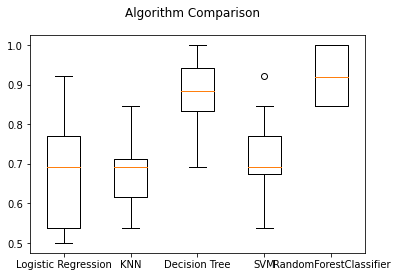

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(classification_report(Y_validation, predictions))

Accuracy Score : 90.09
                precision    recall  f1-score   support

        Broken       0.70      0.80      0.74        20
      Complete       1.00      1.00      1.00        63
    Incomplete       0.88      0.71      0.79        21
Unrecognizable       0.75      0.86      0.80         7

      accuracy                           0.90       111
     macro avg       0.83      0.84      0.83       111
  weighted avg       0.91      0.90      0.90       111



Accuracy Score : 94.59


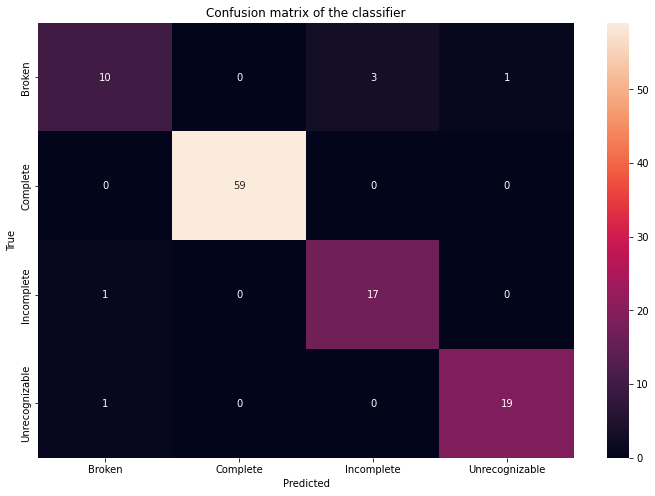

In [ ]:
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))
labels = ['Broken', 'Complete','Incomplete', 'Unrecognizable']

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion matrix of the classifier')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [11]:
model = RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best: 0.953488 using {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [14]:
clf =  RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print('RandomForestClassifier')
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)
print(classification_report(Y_validation, predictions))

RandomForestClassifier
Accuracy Score : 91.89
                precision    recall  f1-score   support

        Broken       0.65      0.79      0.71        14
      Complete       1.00      1.00      1.00        57
    Incomplete       0.96      1.00      0.98        22
Unrecognizable       0.86      0.67      0.75        18

      accuracy                           0.92       111
     macro avg       0.87      0.86      0.86       111
  weighted avg       0.92      0.92      0.92       111



## Tuning

In [ ]:
X_train

NameError: ignored

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline(steps=[('dec_tree', clf)])

n_components = list(range(1,X_train.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = list(range(2, 30))

parameters = dict( dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

print('-------------------------------')
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 5
-------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(classification_report(Y_validation, predictions))

Accuracy Score : 88.29
                precision    recall  f1-score   support

        Broken       0.75      0.67      0.71        18
      Complete       1.00      1.00      1.00        57
    Incomplete       0.68      1.00      0.81        15
Unrecognizable       0.88      0.67      0.76        21

      accuracy                           0.88       111
     macro avg       0.83      0.83      0.82       111
  weighted avg       0.89      0.88      0.88       111



In [ ]:
originalclass = []
predictedclass = []
results = []

model = RandomForestClassifier(max_depth= 30, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) 


kfold = model_selection.KFold(n_splits=8)
cv_results = model_selection.cross_val_score(model, X_train, y_train , cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
results.append(cv_results)
print(' ') 
print('DecisionTreeClassifier')
print('Accuracy Score : %.2f'%(accuracy_score(originalclass, predictedclass)*100))
print(classification_report(originalclass, predictedclass))

 
DecisionTreeClassifier
Accuracy Score : 94.96
                precision    recall  f1-score   support

        Broken       0.84      0.86      0.85        44
      Complete       0.99      1.00      1.00       137
    Incomplete       0.91      1.00      0.95        40
Unrecognizable       0.97      0.81      0.88        37

      accuracy                           0.95       258
     macro avg       0.93      0.92      0.92       258
  weighted avg       0.95      0.95      0.95       258



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf =  clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(classification_report(Y_validation, predictions))

Accuracy Score : 92.79
                precision    recall  f1-score   support

        Broken       0.93      0.65      0.76        20
      Complete       1.00      1.00      1.00        63
    Incomplete       0.81      1.00      0.89        21
Unrecognizable       0.75      0.86      0.80         7

      accuracy                           0.93       111
     macro avg       0.87      0.88      0.86       111
  weighted avg       0.93      0.93      0.92       111



In [ ]:
cv_results = model_selection.cross_val_score(model, X_train, y_train , cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))

In [ ]:
print('Accuracy Score : %.2f'%(accuracy_score(originalclass, predictedclass)*100))
labels = ['Broken', 'Complete','Incomplete', 'Unrecognizable']

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion matrix of the classifier')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Broken', 'Complete','Incomplete', 'Unrecognizable'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/content/drive/MyDrive/Project/Tree_arrow4.png')
Image(graph.create_png())

# GBC

In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


0.531 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.624 + or -0.034 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.903 + or -0.027 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.919 + or -0.037 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.531 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.888 + or -0.028 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.927 + or -0.033 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.934 + or -0.029 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.531 + or -0.007 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.892 + or -0.026 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.903 + or -0.036 for the {'learning_rate': 0.01, 'max_de

# Random forest

In [ ]:
clf =  GradientBoostingClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(classification_report(Y_validation, predictions))

In [ ]:
clf = RandomForestClassifier()

#Train Decision Tree Classifer
clf.fit(X_train, y_train)
#Predict the test data
predictions = clf.predict(X_validation)

print('Accuracy Score : %.2f'%(accuracy_score(Y_validation, predictions)*100))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(classification_report(Y_validation, predictions))

Accuracy Score : 92.79
                precision    recall  f1-score   support

        Broken       0.83      0.75      0.79        20
      Complete       1.00      1.00      1.00        63
    Incomplete       0.83      0.90      0.86        21
Unrecognizable       0.86      0.86      0.86         7

      accuracy                           0.93       111
     macro avg       0.88      0.88      0.88       111
  weighted avg       0.93      0.93      0.93       111



## Code อื่นๆ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

cf_matrix = confusion_matrix(Y_validation, predictions)

print(cf_matrix)
print(classification_report(Y_validation, predictions))

In [ ]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

myarray = np.asarray(original)
matrix = confusion_matrix((myarray),(predictions+1))

class_names = ['Broken', 'Complete', 'Incomplete','Unrecognizable']

fig, ax = plot_confusion_matrix(conf_mat=matrix,
                                show_absolute=True,
                                show_normed=False,
                                colorbar=True,
                                class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 14)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
model_lr = LinearRegression()
mse, bias, var = bias_variance_decomp(model_lr, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_train, y_pred)

In [ ]:
# create a single classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
# apply 2-fold cross-validation, measuring accuracy each time
from sklearn.model_selection import cross_val_score
acc_scores = cross_val_score(model, X, y, cv=2, scoring="accuracy")
print(acc_scores)

In [ ]:
acc_scores =  cross_val_score(model, X, y, cv=10, scoring="accuracy")
print(acc_scores)

In [ ]:
print("KNN: Mean cross-validation accuracy = %.2f" % acc_scores.mean() )

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma='scale')
acc_scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print("SVM: Mean cross-validation accuracy = %.2f" % acc_scores.mean() )

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):
    print(metrics.confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression(solver='liblinear')
acc_scores =  cross_val_score(model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print("Logistic Regression: Mean cross-validation accuracy = %.2f" % acc_scores.mean() )

In [ ]:
print(metrics.confusion_matrix(y_true, y_pred))

In [ ]:
model = DecisionTreeClassifier()
acc_scores =  cross_val_score(model, X, y, cv=10, scoring="accuracy")
print("Decision Tree: Mean cross-validation accuracy = %.2f" % acc_scores.mean() )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_yhat))

In [ ]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=y_test,
                      y_predicted=y_pred, 
                      binary=False)
cm

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
predicted = cross_val_predict(clf, iris.data, iris.target, cv=10) 
metrics.accuracy_score(iris.target, predicted)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)